In [1]:
# Import our dependencies
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Import our input dataset
Merged2_df = pd.read_csv("Resources/Merged2.csv")
Merged2_df.head()

,State,colonies,Maximum_colonies1,Lost_colonies,Percent_lost2,Added_colonies,Renov_colonies3,Percent_renov4,Year,Qtr,...,Diseases,Pestticides,Other3,Unknown,POPESTIMATE2015,POPESTIMATE2016,POPESTIMATE2017,POPESTIMATE2018,POPESTIMATE2019,ESTIMATESBASE2010
0,AL,7000,7000,1800,26,2800,250,4,2015,Q1,...,0.0,2.2,9.1,9.4,4852347,4863525,4874486,4887681,4903185,4780125
1,AZ,35000,35000,4600,13,3400,2100,6,2015,Q1,...,0.1,0.0,1.8,3.1,6829676,6941072,7044008,7158024,7278717,6392288
2,AR,13000,14000,1500,11,1200,90,1,2015,Q1,...,1.5,3.4,1.0,1.0,2978048,2989918,3001345,3009733,3017804,2916031
3,CA,1440000,1690000,255000,15,250000,124000,7,2015,Q1,...,3.0,7.5,6.5,2.8,38918045,39167117,39358497,39461588,39512223,37254519
4,CO,3500,12500,1500,12,200,140,1,2015,Q1,...,1.8,0.6,2.6,5.9,5450623,5539215,5611885,5691287,5758736,5029319


In [2]:
Merged2_df['YQ']= Merged2_df[['Year', 'Qtr']].apply(lambda x: '-'.join(x.values.astype(str)), axis='columns')

In [3]:
Merged2_df.head()

,State,colonies,Maximum_colonies1,Lost_colonies,Percent_lost2,Added_colonies,Renov_colonies3,Percent_renov4,Year,Qtr,...,Pestticides,Other3,Unknown,POPESTIMATE2015,POPESTIMATE2016,POPESTIMATE2017,POPESTIMATE2018,POPESTIMATE2019,ESTIMATESBASE2010,YQ
0,AL,7000,7000,1800,26,2800,250,4,2015,Q1,...,2.2,9.1,9.4,4852347,4863525,4874486,4887681,4903185,4780125,2015-Q1
1,AZ,35000,35000,4600,13,3400,2100,6,2015,Q1,...,0.0,1.8,3.1,6829676,6941072,7044008,7158024,7278717,6392288,2015-Q1
2,AR,13000,14000,1500,11,1200,90,1,2015,Q1,...,3.4,1.0,1.0,2978048,2989918,3001345,3009733,3017804,2916031,2015-Q1
3,CA,1440000,1690000,255000,15,250000,124000,7,2015,Q1,...,7.5,6.5,2.8,38918045,39167117,39358497,39461588,39512223,37254519,2015-Q1
4,CO,3500,12500,1500,12,200,140,1,2015,Q1,...,0.6,2.6,5.9,5450623,5539215,5611885,5691287,5758736,5029319,2015-Q1


In [4]:
Merged2_df['YQ_codes']=Merged2_df.YQ.astype('category').cat.codes

In [8]:
Merged2_df.head()

,State,colonies,Maximum_colonies1,Lost_colonies,Percent_lost2,Added_colonies,Renov_colonies3,Percent_renov4,Year,Qtr,...,Other3,Unknown,POPESTIMATE2015,POPESTIMATE2016,POPESTIMATE2017,POPESTIMATE2018,POPESTIMATE2019,ESTIMATESBASE2010,YQ,YQ_codes
0,AL,7000,7000,1800,26,2800,250,4,2015,Q1,...,9.1,9.4,4852347,4863525,4874486,4887681,4903185,4780125,2015-Q1,0
1,AZ,35000,35000,4600,13,3400,2100,6,2015,Q1,...,1.8,3.1,6829676,6941072,7044008,7158024,7278717,6392288,2015-Q1,0
2,AR,13000,14000,1500,11,1200,90,1,2015,Q1,...,1.0,1.0,2978048,2989918,3001345,3009733,3017804,2916031,2015-Q1,0
3,CA,1440000,1690000,255000,15,250000,124000,7,2015,Q1,...,6.5,2.8,38918045,39167117,39358497,39461588,39512223,37254519,2015-Q1,0
4,CO,3500,12500,1500,12,200,140,1,2015,Q1,...,2.6,5.9,5450623,5539215,5611885,5691287,5758736,5029319,2015-Q1,0


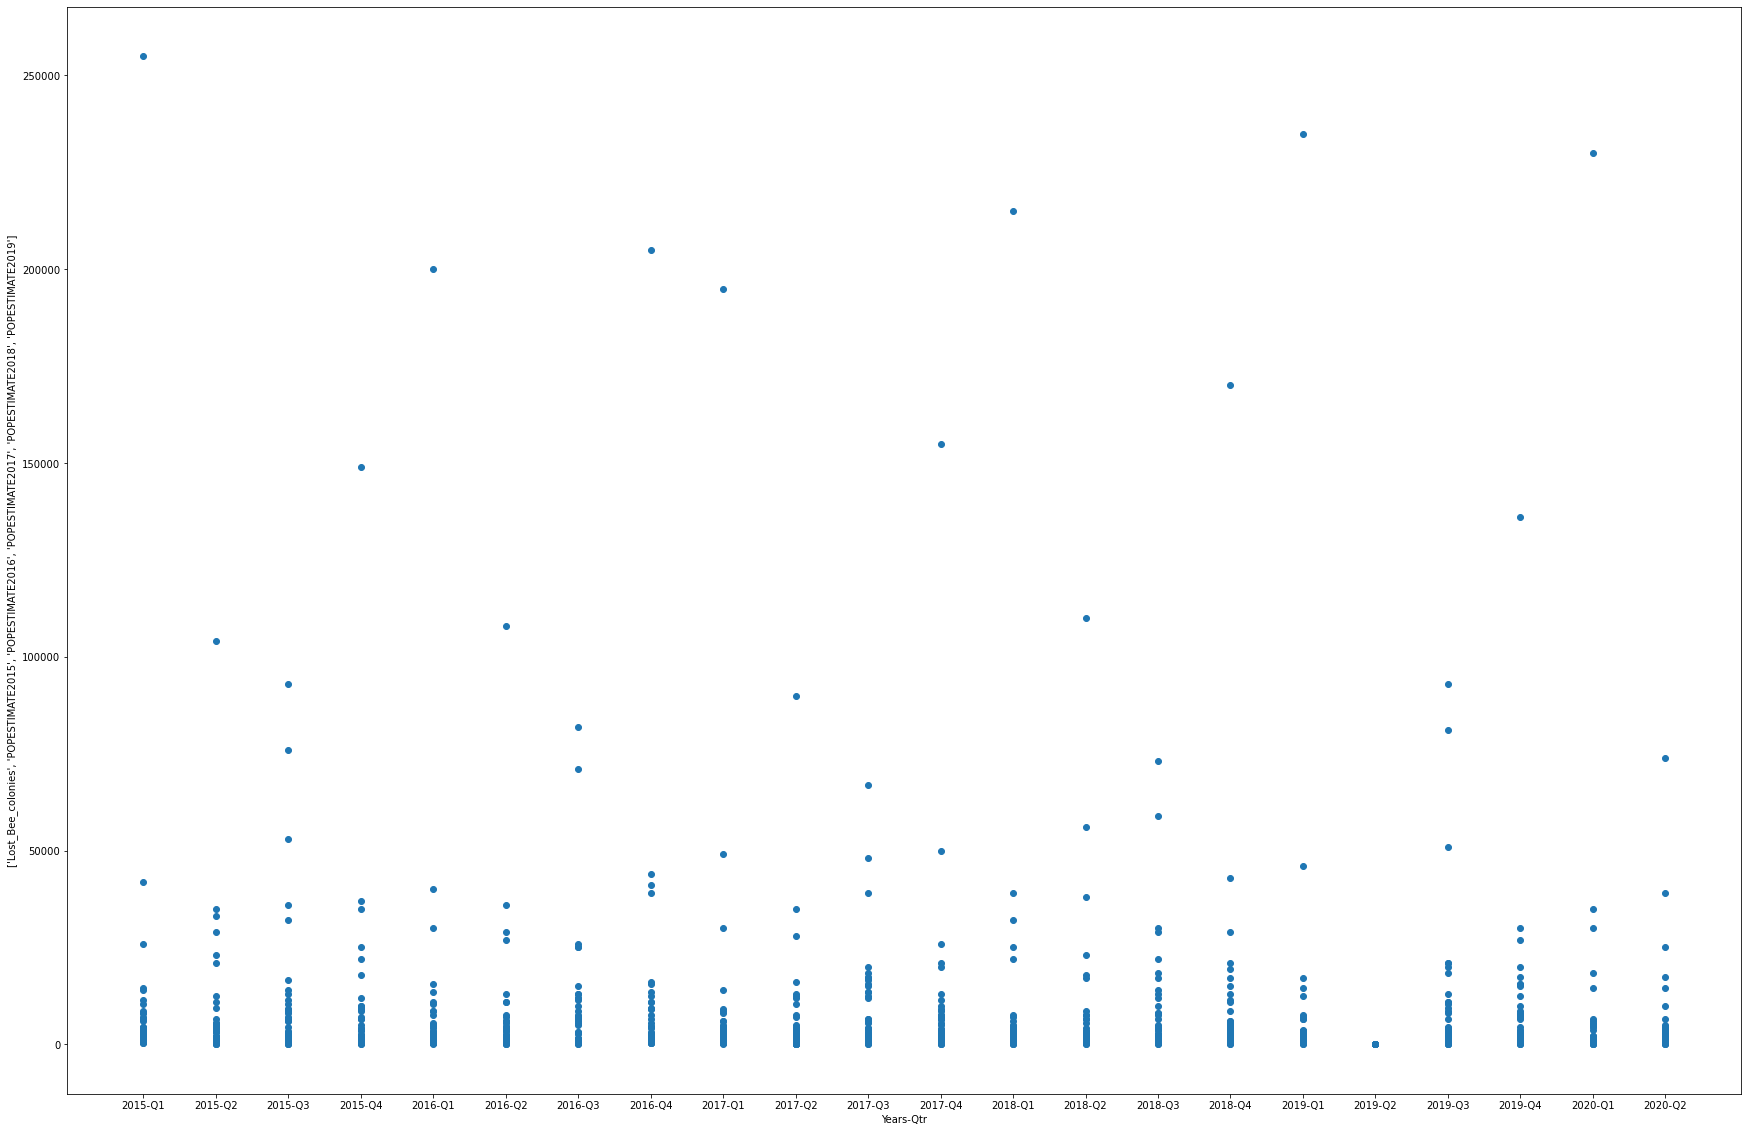

In [19]:
# Visually inspect the relationship of Year and Lost Colonies
plt.figure(figsize=(30,20))
plt.scatter(Merged2_df.YQ, Merged2_df.Lost_colonies)
plt.xlabel('Years-Qtr')
plt.ylabel(['Lost_Bee_colonies', 'POPESTIMATE2015', 'POPESTIMATE2016', 'POPESTIMATE2017', 'POPESTIMATE2018', 'POPESTIMATE2019'])
plt.show()


In [9]:
#  formats the data to meet the requirements of the Scikit-learn library
X = Merged2_df.YQ_codes.values.reshape(-1, 1)

In [10]:
# Examine the first five entries 
X[:5]

array([[0],
       [0],
       [0],
       [0],
       [0]], dtype=int8)

In [11]:
# Examine the shape
X.shape

(990, 1)

In [12]:
# Assign the target variable
y = Merged2_df.Lost_colonies

In [13]:
# Create a linear regression model instance
model = LinearRegression()

In [14]:
# Learning stage, ie. fitting or training
model.fit(X, y)

LinearRegression()

In [15]:
# Use predict method to generate predictions
y_pred = model.predict(X)
print(y_pred.shape)

(990,)


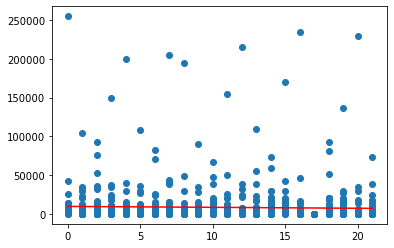

In [16]:
# plot the predictions as a red line against the data points
plt.scatter(X, y)
plt.plot(X, y_pred, color='red')
plt.show()

In [17]:
#  examine the specific parameters of our model: the slope and 
# the y-intercept. The slope is represented by model.coef_, and model.intercept_ is the y-intercep.
print(model.coef_)
print(model.intercept_)

[-120.5585043]
9708.2380324989
